<a href="https://colab.research.google.com/github/Lokeshwaran2975/Elevate-Labs-Task-5-Decision-Trees-and-Random-Forests/blob/main/Task_5_Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1 : Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

STEP 2 : Load Dataset

In [4]:
data = pd.read_csv('heart.csv')
print("First 5 Rows:")
data.head()

First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
print("\nData Info:\n")
print(data.info())


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


STEP 3 : Preprocess Data

In [6]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Encode categorical if necessary
if y.dtype == 'object':
    y = pd.factorize(y)[0]

STEP 4 : Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP 5 : Decision Tree Classifier

In [8]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

STEP 6 : Decision Tree Accuracy

In [9]:
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



STEP 7 : Visualize Decision Tree

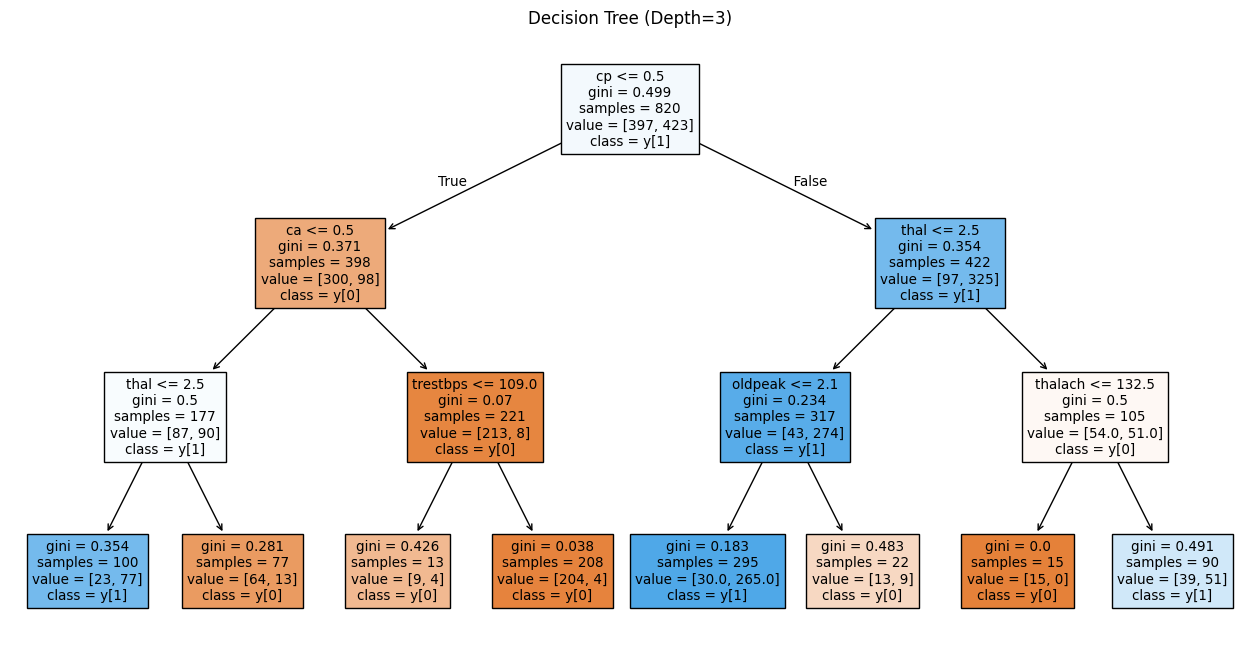

In [10]:
plt.figure(figsize=(16, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree (Depth=3)")
plt.show()

STEP 8 : Cross-validation Score (Decision Tree)

In [11]:
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
print("\nCross-Validation Accuracy (Decision Tree):", np.round(dt_cv_scores.mean(), 3))


Cross-Validation Accuracy (Decision Tree): 0.83


STEP 9 : Random Forest Classifier

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

STEP 10 : Random Forest Accuracy

In [13]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



STEP 11 : Feature Importance

In [14]:
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df.sort_values(by="Importance", ascending=False, inplace=True)

STEP 12 : Plot Feature Importances

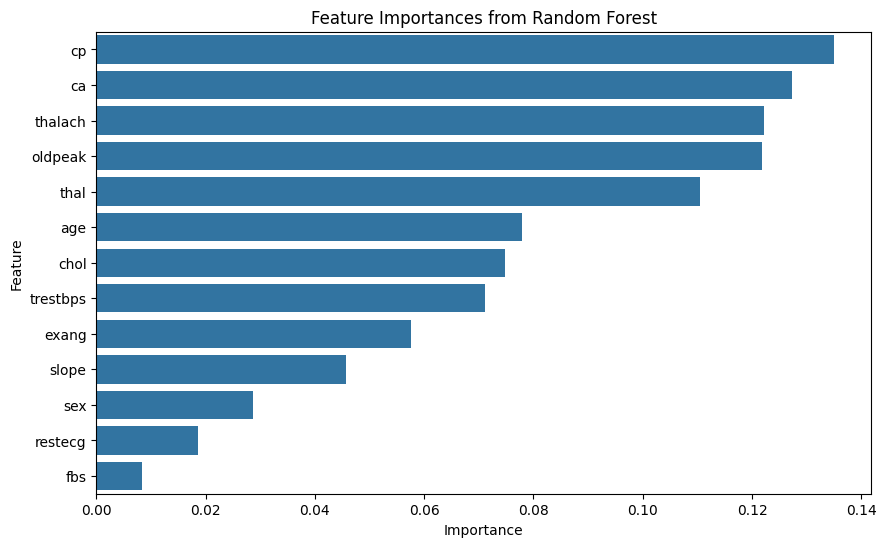

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importances from Random Forest")
plt.show()

STEP 13 : Cross-validation Score (Random Forest)

In [16]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-Validation Accuracy (Random Forest):", np.round(rf_cv_scores.mean(), 3))


Cross-Validation Accuracy (Random Forest): 0.997
